In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import csv
%matplotlib inline
%config IPCompleter.greedy=True
np.random.seed(1)

In [2]:
df = pd.read_csv('762073812_T_T100D_MARKET_ALL_CARRIER.csv')
df.describe()

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,MONTH,Unnamed: 7
count,192743.000000,192743.000000,192743.000000,0.0
mean,12750.507873,12761.863264,6.259657,NaN
std,1595.442198,1593.485620,3.655441,NaN
min,10001.000000,10001.000000,1.000000,NaN
25%,11292.000000,11292.000000,3.000000,NaN
50%,12889.000000,12889.000000,6.000000,NaN
75%,14100.000000,14100.000000,10.000000,NaN
max,16883.000000,16883.000000,12.000000,NaN


In [3]:
df.head(10)

,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,MONTH,Unnamed: 7
0,04Q,Tradewind Aviation,13535,MVL,12197,HPN,3,NaN
1,04Q,Tradewind Aviation,12197,HPN,13535,MVL,3,NaN
2,04Q,Tradewind Aviation,14576,ROC,15167,TEB,3,NaN
3,04Q,Tradewind Aviation,11042,CLE,12197,HPN,3,NaN
4,04Q,Tradewind Aviation,14635,RSW,10423,AUS,3,NaN
5,04Q,Tradewind Aviation,10792,BUF,14576,ROC,3,NaN
6,04Q,Tradewind Aviation,10670,BLM,16883,N7C,3,NaN
7,04Q,Tradewind Aviation,12265,IAG,10540,BED,3,NaN
8,04Q,Tradewind Aviation,11615,EWB,15167,TEB,3,NaN
9,04Q,Tradewind Aviation,13398,MMU,14275,PTK,3,NaN


In [4]:
print(df)

       UNIQUE_CARRIER          UNIQUE_CARRIER_NAME  ORIGIN_AIRPORT_ID ORIGIN  \
0                 04Q           Tradewind Aviation              13535    MVL   
1                 04Q           Tradewind Aviation              12197    HPN   
2                 04Q           Tradewind Aviation              14576    ROC   
3                 04Q           Tradewind Aviation              11042    CLE   
4                 04Q           Tradewind Aviation              14635    RSW   
...               ...                          ...                ...    ...   
192738             ZW  Air Wisconsin Airlines Corp              11612    EVV   
192739             ZW  Air Wisconsin Airlines Corp              14696    SBN   
192740             ZW  Air Wisconsin Airlines Corp              14730    SDF   
192741             ZW  Air Wisconsin Airlines Corp              12217    HSV   
192742             ZW  Air Wisconsin Airlines Corp              10785    BTV   

        DEST_AIRPORT_ID DEST  MONTH  Un

In [5]:
data = df.values
print(data)

[['04Q' 'Tradewind Aviation' 13535 ... 'HPN' 3 nan]
 ['04Q' 'Tradewind Aviation' 12197 ... 'MVL' 3 nan]
 ['04Q' 'Tradewind Aviation' 14576 ... 'TEB' 3 nan]
 ...
 ['ZW' 'Air Wisconsin Airlines Corp' 14730 ... 'ORD' 7 nan]
 ['ZW' 'Air Wisconsin Airlines Corp' 12217 ... 'ORD' 7 nan]
 ['ZW' 'Air Wisconsin Airlines Corp' 10785 ... 'ORD' 7 nan]]


In [6]:
type(data)

numpy.ndarray

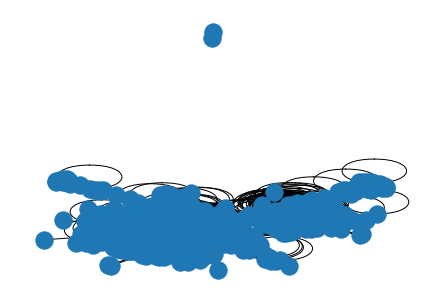

In [7]:
G=nx.Graph()

for i in data:
    G.add_edge(i[3], i[5])
    
nx.draw(G, pos=nx.spring_layout(G))
plt.show()

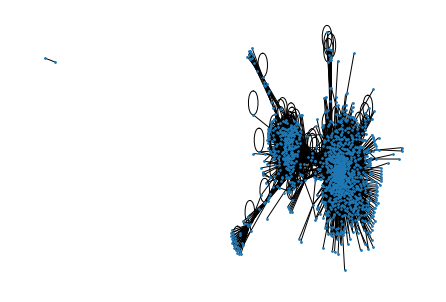

In [8]:
nx.draw(G, pos=nx.spring_layout(G), node_size=3)
plt.show()

In [9]:
# Find self edge
for i in data:
    if i[3]==i[5]:
        print(i)
        

['04Q' 'Tradewind Aviation' 12197 'HPN' 12197 'HPN' 10 nan]
['04Q' 'Tradewind Aviation' 14843 'SJU' 14843 'SJU' 11 nan]
['09Q' 'Swift Air, LLC d/b/a Eastern Air Lines d/b/a Eastern' 13303 'MIA'
 13303 'MIA' 8 nan]
['09Q' 'Swift Air, LLC d/b/a Eastern Air Lines d/b/a Eastern' 14683 'SAT'
 14683 'SAT' 8 nan]
['09Q' 'Swift Air, LLC d/b/a Eastern Air Lines d/b/a Eastern' 10185 'AEX'
 10185 'AEX' 8 nan]
['09Q' 'Swift Air, LLC d/b/a Eastern Air Lines d/b/a Eastern' 14259 'PSM'
 14259 'PSM' 8 nan]
['09Q' 'Swift Air, LLC d/b/a Eastern Air Lines d/b/a Eastern' 11995 'GSO'
 11995 'GSO' 8 nan]
['09Q' 'Swift Air, LLC d/b/a Eastern Air Lines d/b/a Eastern' 10466 'AZA'
 10466 'AZA' 8 nan]
['09Q' 'Swift Air, LLC d/b/a Eastern Air Lines d/b/a Eastern' 13303 'MIA'
 13303 'MIA' 3 nan]
['09Q' 'Swift Air, LLC d/b/a Eastern Air Lines d/b/a Eastern' 14683 'SAT'
 14683 'SAT' 3 nan]
['09Q' 'Swift Air, LLC d/b/a Eastern Air Lines d/b/a Eastern' 11618 'EWR'
 11618 'EWR' 3 nan]
['09Q' 'Swift Air, LLC d/b/a Easte

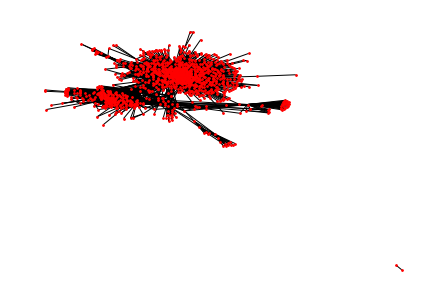

In [10]:
G2=nx.Graph()

for i in data:
    if i[3]!=i[5]:
        G2.add_edge(i[3], i[5])
nx.draw(G2, pos=nx.spring_layout(G2), with_labels=False, node_color="red", edge_color="black", node_size=3, width=1)
plt.show()

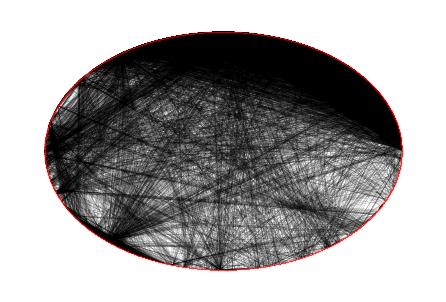

In [11]:
nx.draw(G2, pos=nx.circular_layout(G2), with_labels=False, node_color="red", edge_color="black", node_size=0.1, width=0.1)

In [12]:
print(G2.number_of_nodes(), G2.number_of_edges(), nx.number_connected_components(G2))
num_nodes = G2.number_of_nodes()
num_edges = G2.number_of_edges()
num_compo = nx.number_connected_components(G2)

1247 13775 2


In [13]:
average_degree = 2*num_edges/num_nodes
print(average_degree)

22.093023255813954


In [14]:
degree_sequence = sorted([d for n, d in G2.degree()], reverse=True)
print(degree_sequence)
print(np.mean(degree_sequence))

[244, 228, 225, 208, 206, 203, 203, 191, 189, 189, 188, 187, 186, 182, 182, 180, 176, 172, 168, 167, 166, 166, 164, 159, 157, 155, 154, 154, 153, 153, 149, 149, 148, 148, 148, 145, 144, 144, 144, 144, 142, 142, 142, 139, 139, 139, 139, 137, 134, 131, 130, 129, 127, 126, 126, 125, 125, 125, 124, 124, 123, 123, 122, 120, 118, 117, 116, 114, 113, 112, 112, 112, 110, 110, 109, 109, 108, 105, 105, 105, 103, 103, 103, 102, 102, 99, 98, 97, 97, 97, 97, 97, 95, 95, 94, 94, 92, 92, 89, 89, 86, 86, 81, 80, 79, 79, 78, 77, 77, 77, 75, 75, 74, 74, 71, 71, 70, 70, 70, 70, 70, 68, 68, 68, 67, 67, 67, 67, 67, 64, 64, 63, 63, 62, 62, 61, 61, 61, 59, 59, 58, 57, 57, 57, 56, 55, 55, 55, 54, 53, 53, 52, 51, 51, 50, 50, 50, 49, 49, 48, 48, 48, 48, 48, 47, 47, 46, 46, 46, 45, 45, 45, 45, 45, 45, 44, 43, 42, 42, 42, 41, 41, 41, 40, 39, 38, 37, 37, 37, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 31, 31

In [15]:
print(np.unique(degree_sequence, return_counts=True))
degree = np.unique(degree_sequence, return_counts=True)[0]
print(degree)

p_k = np.unique(degree_sequence, return_counts=True)[1]/num_nodes
print(p_k)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  61,  62,  63,  64,  67,  68,
        70,  71,  74,  75,  77,  78,  79,  80,  81,  86,  89,  92,  94,
        95,  97,  98,  99, 102, 103, 105, 108, 109, 110, 112, 113, 114,
       116, 117, 118, 120, 122, 123, 124, 125, 126, 127, 129, 130, 131,
       134, 137, 139, 142, 144, 145, 148, 149, 153, 154, 155, 157, 159,
       164, 166, 167, 168, 172, 176, 180, 182, 186, 187, 188, 189, 191,
       203, 206, 208, 225, 228, 244]), array([195, 139,  86,  86,  61,  56,  48,  41,  38,  23,  23,  24,  18,
        22,  20,  16,  13,  17,  17,   8,   7,   5,   5,  10,   7,   6,
         3,   6,   7,   9,  10,   7,   8,   2,   9,   6,   3,   1,   1,
         1,   3,   3,   

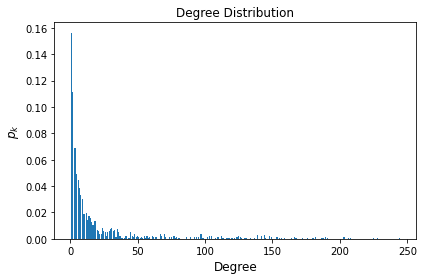

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(degree, p_k)
ax.set_title("Degree Distribution")
ax.set_xlabel("Degree", fontsize=12)
ax.set_ylabel("$p_k$", fontsize=12)
fig.tight_layout()
plt.show()

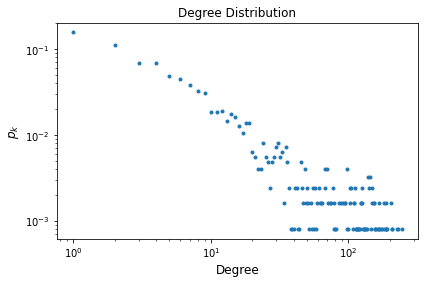

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degree, p_k, marker=".", linestyle="")
ax.set_title("Degree Distribution")
ax.set_xlabel("Degree", fontsize=12)
ax.set_ylabel("$p_k$", fontsize=12)
fig.tight_layout()
plt.yscale("log")
plt.xscale("log")
plt.show()

In [18]:
degree_centrality_dict = nx.degree_centrality(G2)

sorted_degree_centrality_dict = sorted(degree_centrality_dict.items(), key=lambda x:x[1], reverse=True)
print(sorted_degree_centrality_dict)

[('ANC', 0.1958266452648475), ('DEN', 0.18298555377207062), ('ORD', 0.18057784911717495), ('DFW', 0.16693418940609953), ('MEM', 0.1653290529695024), ('ATL', 0.16292134831460675), ('LAX', 0.16292134831460675), ('SDF', 0.15329052969502407), ('MSP', 0.15168539325842698), ('CLT', 0.15168539325842698), ('BNA', 0.1508828250401284), ('HPN', 0.15008025682182985), ('LAS', 0.1492776886035313), ('PHL', 0.14606741573033707), ('IAD', 0.14606741573033707), ('OAK', 0.14446227929373998), ('DTW', 0.14125200642054575), ('PHX', 0.13804173354735153), ('FLL', 0.1348314606741573), ('STL', 0.13402889245585875), ('MIA', 0.1332263242375602), ('BWI', 0.1332263242375602), ('IAH', 0.13162118780096307), ('MCO', 0.1276083467094703), ('DAL', 0.1260032102728732), ('CVG', 0.12439807383627609), ('TEB', 0.12359550561797752), ('EWR', 0.12359550561797752), ('AUS', 0.12279293739967898), ('SLC', 0.12279293739967898), ('MDW', 0.11958266452648475), ('BOS', 0.11958266452648475), ('RDU', 0.1187800963081862), ('IND', 0.118780096

In [19]:
closeness_centrality_dict = nx.closeness_centrality(G2)

sorted_closeness_centrality_dict = sorted(closeness_centrality_dict.items(), key=lambda x:x[1], reverse=True)
print(sorted_closeness_centrality_dict)

[('LAX', 0.48345784751766185), ('ANC', 0.481210077595069), ('SDF', 0.4808374797804387), ('OAK', 0.4802796636786053), ('MEM', 0.48009401247501865), ('DEN', 0.47732636828319497), ('IAD', 0.4771429928055602), ('ORD', 0.47622822479788085), ('MSP', 0.47568104568091657), ('ATL', 0.47296390337885497), ('PHX', 0.47116965488348755), ('SEA', 0.47099097848800653), ('BNA', 0.46992175946760245), ('DFW', 0.4693889683570949), ('DTW', 0.4690344449670971), ('SLC', 0.46868045670674463), ('CLT', 0.46621742127360105), ('BFI', 0.46621742127360105), ('MIA', 0.465344027827978), ('MCO', 0.46499558602503677), ('BWI', 0.4648215607308657), ('CVG', 0.4646476656464172), ('SFO', 0.4632611750365062), ('MDW', 0.4629158443059535), ('IAH', 0.4617112305847112), ('IND', 0.4615396545049696), ('EWR', 0.4615396545049696), ('BOS', 0.4613682058963125), ('SAT', 0.4613682058963125), ('PIT', 0.460001188989953), ('PDX', 0.45645101443325), ('MKE', 0.45411451929538327), ('ONT', 0.4536169504283686), ('JFK', 0.4527900875949228), ('MC

In [20]:
betweenness_centrality_dict = nx.betweenness_centrality(G2)

sorted_betweenness_centrality_dict = sorted(betweenness_centrality_dict.items(), key=lambda x:x[1], reverse=True)
print(sorted_betweenness_centrality_dict)

[('ANC', 0.26910071321294493), ('FAI', 0.061177101157799), ('BFI', 0.051534188804022434), ('HPN', 0.05125175726754064), ('SEA', 0.046894018789886596), ('A43', 0.04563638520725996), ('MSP', 0.04040862769853825), ('TEB', 0.04022160461268872), ('OAK', 0.03929113570883404), ('DEN', 0.0380067377851211), ('VNY', 0.03662225334434661), ('ENA', 0.03545619519307914), ('LAX', 0.029703377385216775), ('ORD', 0.02924413354907966), ('MEM', 0.026228346268438035), ('DFW', 0.024120860112740783), ('HHR', 0.022523678769733397), ('SDF', 0.02242058600265545), ('IAD', 0.020594997687148356), ('MQY', 0.02039198258794318), ('BOS', 0.018985041319469296), ('DTW', 0.018784862869618134), ('PHX', 0.01845125920467564), ('WRG', 0.018311400707157144), ('JNU', 0.01755884861699573), ('MDW', 0.017422621034252156), ('WFB', 0.01737665136064148), ('ADQ', 0.017087537735103565), ('HNL', 0.016437088519310018), ('DAL', 0.016063257399410173), ('BNA', 0.01570869705687331), ('ATL', 0.015479406156538335), ('LAS', 0.01429282596780737

In [21]:
average_path_length = nx.average_shortest_path_length(G2)

NetworkXError: Graph is not connected.

In [22]:
for connected_component in (G.subgraph(c).copy() for c in nx.connected_components(G2)):
    print(connected_component.number_of_nodes(), nx.average_shortest_path_length(connected_component))

1245 3.1209274396621858
2 1.0


In [23]:
for connected_component in (G.subgraph(c).copy() for c in nx.connected_components(G2)):
    print(nx.diameter(connected_component))

7
1


In [24]:
average_clustering_coefficient = nx.average_clustering(G2)
print(average_clustering_coefficient)

0.46884280432286535


In [25]:
degree_assortativity = nx.degree_assortativity_coefficient(G2)
print(degree_assortativity)

0.05340641943416428
